# 聚类算法简介

定义：使用不同的聚类准贼，产生的聚类结果不同。  
&emsp;&emsp;聚类算法是一种典型的无监督学习算法，主要用于将相似的样本⾃动归到⼀个类别中。   
&emsp;&emsp;在聚类算法中根据样本之间的相似性，将样本划分到不同的类别中，对于不同的相似度计算⽅法，会得到不同的聚类结果，常⽤的相似度计算⽅法有欧式距离法。
- 聚类算法和分类算法最大的区别？  
    - 聚类算法是⽆监督的学习算法，⽽分类算法属于监督的学习算法。
    
    
- 聚类算法的分类：
    - 粗聚类
    - 细聚类

***
# 聚类算法api初步使用

- sklearn.cluster.KMeans(n_clusters=8)
    - 参数:
        - n_clusters:开始的聚类中⼼数量（整型，缺省值=8，⽣成的聚类数，即产⽣的质⼼（centroids）数）
    - 方法：
        - estimator.fit(x)-->训练
        - estimator.predict(x)-->预测
        - estimator.fit_predict(x)-->先训练，再预测


***
小案例  
&emsp;&emsp;随机创建不同⼆维数据集作为训练集，并结合k-means算法将其聚类，你可以尝试分别聚类不同数量的簇，并观察聚类效果

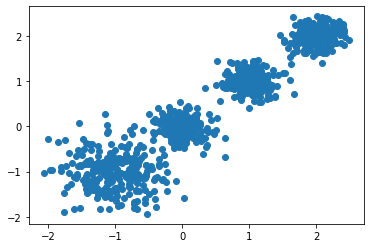

In [10]:
import matplotlib.pyplot as plt
#数据集
from sklearn.datasets.samples_generator import make_blobs 
#聚类算法
from sklearn.cluster import KMeans 
#CH方法评估，数值越大，越好
from sklearn.metrics import calinski_harabasz_score 

#创建数据集
X,y=make_blobs(n_samples=1000,n_features=2,centers=[[-1, -1], [0, 0], [1, 1], [2, 2]],
                cluster_std=[0.4,0.2,0.2,0.2],
                random_state=2)

#数据可视化
plt.scatter(X[:,0],X[:,1],marker='o')
plt.show()

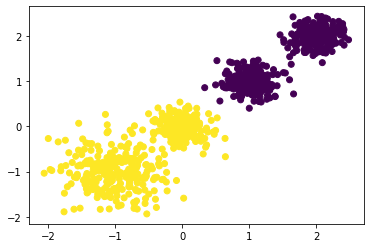

3153.0075907472537


In [11]:
#使用k-means进行聚类，并使用CH方法评测
#聚类=2
y_pred=KMeans(n_clusters=2,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

#⽤Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

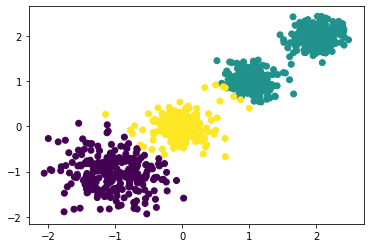

2946.7014202535643


In [12]:
#使用k-means进行聚类，并使用CH方法评测
#聚类=3
y_pred=KMeans(n_clusters=3,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

#⽤Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

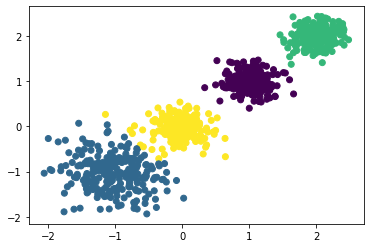

6176.234055933557


In [13]:
#使用k-means进行聚类，并使用CH方法评测
#聚类=4
y_pred=KMeans(n_clusters=4,random_state=2).fit_predict(X)
plt.scatter(X[:,0],X[:,1],c=y_pred)
plt.show()

#⽤Calinski-Harabasz Index评估的聚类分数
print(calinski_harabasz_score(X,y_pred))

由此分析，聚类为4时，聚类效果最好！

***
# 聚类算法实现流程

k-means包含两层内容：
- K:初始中心点个数；
- means：求中心点到其他数据点距离的平均值

k-means聚类步骤：
- （1）随机设置K个特征空间内的点作为初始的聚类中⼼
- （2）对于其他每个点计算到K个中⼼的距离，未知的点选择最近的⼀个聚类中⼼点作为标记类别
- （3）接着对着标记的聚类中⼼之后，重新计算出每个聚类的新中⼼点（平均值）
- （4）如果计算得出的新中⼼点与原中⼼点⼀样（质⼼不再移动），那么结束，否则重新进⾏第⼆步过程
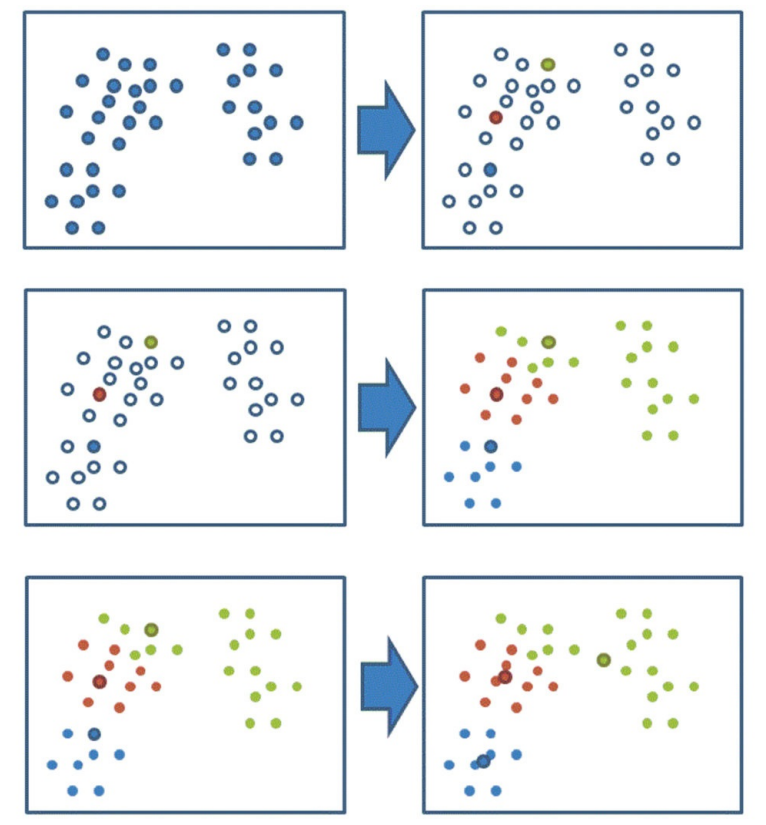

注意：由于每次都要计算所有样本与每一个质心之间的相似度，故在大规模的数据集上，K-Means算法的收敛速度比较慢。

***
# 模型评估
- SSE
- “肘”部法
- SC系数
- CH系数

## 误差平方和——SSE
$$
S S E=\sum_{\mathrm{i}=1}^{\mathrm{k}} \sum_{p \in C_{i}}\left|p-m_{i}\right|^{2}
$$
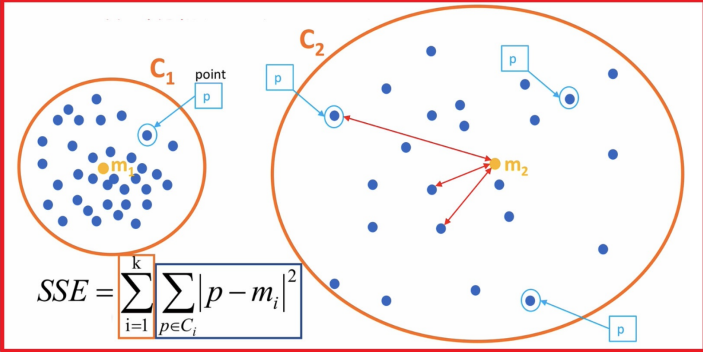

其中k=2，表示有两个中心质点
- 误差平方和的值越小越好

## “肘”方法——K值确定

- （1）对于n个点的数据集，迭代计算k from 1 to n，每次聚类完成后计算每个点到其所属的簇中⼼的距离的平⽅和；
- （2）平⽅和是会逐渐变⼩的，直到k==n时平⽅和为0，因为每个点都是它所在的簇中⼼本身。
- （3）在这个平⽅和变化过程中，会出现⼀个拐点也即“肘”点，下降率突然变缓时即认为是最佳的k值。  
在决定什么时候停⽌训练时，肘形判据同样有效，数据通常有更多的噪⾳，在增加分类⽆法带来更多回报时，我们停⽌增加类别。
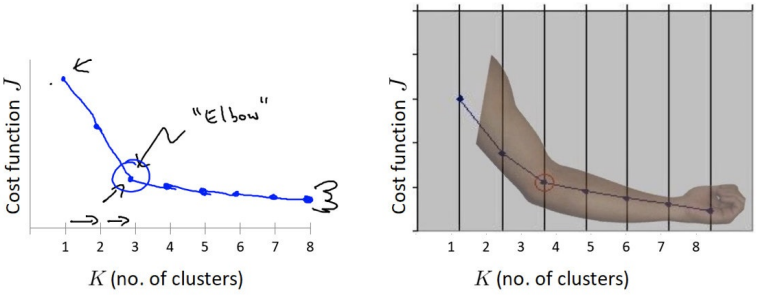

## 轮廓系数法——SC系数

结合了聚类的凝聚度（Cohesion）和分离度（Separation），⽤于评估聚类的效果：
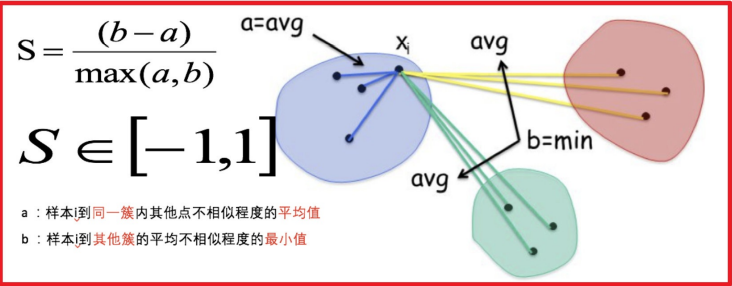

目的：
- 内部距离最⼩化，外部距离最⼤化
- 平均轮廓系数的取值范围为[-1,1]，系数越⼤，聚类效果越好
- 簇内样本的距离越近，簇间样本距离越远

## CH系数

&emsp;&emsp;类别内部数据的协⽅差越⼩越好，类别之间的协⽅差越⼤越好（换句话说：类别内部数据的距离平⽅和越⼩越好，类别之间的距离平⽅和越⼤越好），这样的Calinski-Harabasz分数s会⾼，分数s⾼则聚类效果越好。

$$
\mathrm{s}(\mathrm{k})=\frac{\operatorname{tr}\left(B_{k}\right)}{\operatorname{tr}\left(W_{k}\right)} \frac{m-k}{k-1}
$$

tr为矩阵的迹, B 为类别之间的协⽅差矩阵，W 为类别内部数据的协⽅差矩阵,m为训练集样本数，k为类别数。
- 分数s⾼则聚类效果越好
- CH需要达到的⽬的：⽤尽量少的类别聚类尽量多的样本，同时获得较好的聚类效果

***
# 算法优化

- k-means算法优缺点总结：
    - 优点：
        - 1.原理简单（靠近中心点），实现容易
        - 2.聚类效果上（依赖K的选择）
        - 3.空间复杂度o(N)，时间复杂度o(IKN)
     - 缺点：
         - 1.对离群点，噪声敏感 （中⼼点易偏移）
         - 2.很难发现⼤⼩差别很⼤的簇及进⾏增量计算
         - 3.结果不⼀定是全局最优，只能保证局部最优（与K的个数及初值选取有关）


优化方法：

| 优化⽅法 | 思路 |  
| --- | --- |  
| Canopy+kmeans | Canopy粗聚类配合kmeans |  
| kmeans++ | 距离越远越容易成为新的质⼼ |  
| ⼆分k-means | 拆除SSE最⼤的簇 |  
| k-medoids | 和kmeans选取中⼼点的⽅式不同 |  
| kernel kmeans | 映射到⾼维空间 |  
| ISODATA | 动态聚类，可以更改K值⼤⼩ |  
| Mini-batch K-Means | ⼤数据集分批聚类 |    